In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [4]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [5]:
df.shape

(50, 17)

# Data Analysis

In [21]:
#10 most exported state
state_t_expor = df.iloc[:,[1,3]]
state_t_expor = state_t_expor.sort_values('total exports', ascending=False)
state_t_expor = state_t_expor.head(10)
state_t_expor

,state,total exports
4,California,16472.88
14,Iowa,11273.76
12,Illinois,8709.48
22,Minnesota,7192.33
26,Nebraska,7114.13
42,Texas,6648.22
13,Indiana,5050.23
15,Kansas,4589.01
34,Ohio,3979.79
24,Missouri,3933.42


most exported states are California than lowa than Illinois and so on

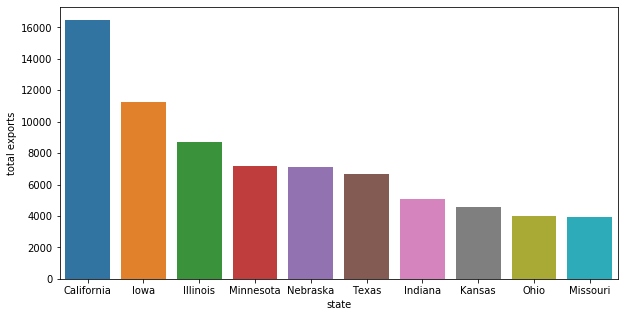

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='state', y='total exports', data=state_t_expor)

In [25]:
#total export of states
fig = px.line(df,x='state', y='total exports')
fig.show()

### beef, pork, poultry, dairy

In [34]:
#total export of beef, pork, poultry, dairy
bppd = df.loc[:,['beef','pork','poultry','dairy']].sum()
bppd

beef       5419.70
pork       6114.10
poultry    5635.00
dairy      4786.26
dtype: float64

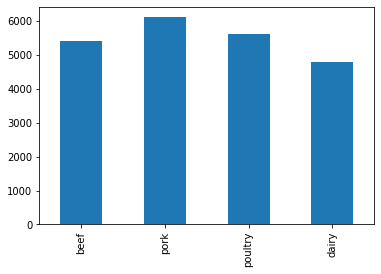

In [35]:
bppd.plot(kind='bar')

In [64]:
#maximum export of beef, pork, poultry and dairy
maximum = df.loc[:,['beef','pork','poultry','dairy']]
maximum.iloc[maximum['beef'].idxmax()]

beef       961.00
pork        42.70
poultry    339.20
dairy      240.55
Name: 42, dtype: float64

In [27]:
#export of beef, pork, poultry, dairy by state
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['state'], y=df['beef'], mode='lines', name='beef'))
fig.add_trace(go.Scatter(x=df['state'], y=df['pork'], mode='lines', name='pork'))
fig.add_trace(go.Scatter(x=df['state'], y=df['poultry'], mode='lines', name='poultry'))
fig.add_trace(go.Scatter(x=df['state'], y=df['dairy'], mode='lines', name='dairy'))

fig.show()

### fruits

In [29]:
#total fruits export by states
fig = px.line(df,x='state', y='total fruits')
fig.show()

California export most fruit and than washington

In [38]:
fresh_proc = df.loc[:,['fruits fresh', 'fruits proc']].sum()
fresh_proc

fruits fresh    4502.5
fruits proc     9586.8
dtype: float64

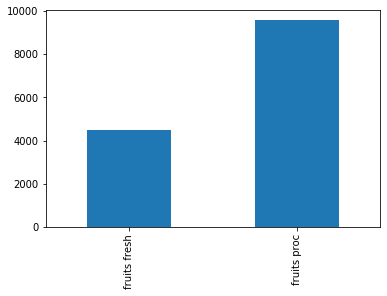

In [39]:
fresh_proc.plot(kind='bar')

fruits proc is sold double than fruits fresh

In [31]:
#total export of fruit fresh and fruit proc
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['state'], y=df['fruits fresh'], mode='lines', name='fruit fresh'))
fig.add_trace(go.Scatter(x=df['state'], y=df['fruits proc'], mode='lines', name='fruit proc'))


### veggies

In [65]:
#10 most exported veggies state
veggies = df.loc[:,['state','total veggies']].sort_values('total veggies', ascending=False)
veggies.head(10)

,state,total veggies
4,California,2106.79
8,Florida,450.86
2,Arizona,386.91
46,Washington,363.79
11,Idaho,319.19
21,Michigan,189.96
9,Georgia,154.77
32,North Carolina,150.45
48,Wisconsin,148.99
31,New York,143.37


In [40]:
#veggies sold by states
fig = px.line(df,x='state', y='total veggies')
fig.show()

In [43]:
#total export of veggies fresh and veggies proc
veggies_proc_fresh = df.loc[:,['veggies fresh','veggies proc']].sum()
veggies_proc_fresh

veggies fresh    2221.4
veggies proc     3605.1
dtype: float64

In [42]:
#total export of fruit fresh and fruit proc
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['state'], y=df['veggies fresh'], mode='lines', name='veggies fresh'))
fig.add_trace(go.Scatter(x=df['state'], y=df['veggies proc'], mode='lines', name='veggies proc'))


### corn, wheat, cotton

In [50]:
#total sell of corn, wheat and cotton
cwc = df.loc[:,['corn','wheat','cotton']].sum()
cwc

corn      13652.10
wheat     11141.20
cotton     8466.25
dtype: float64

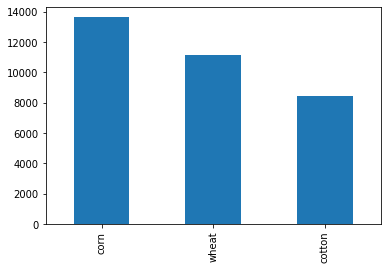

In [51]:
cwc.plot(kind='bar')

In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['state'], y=df['corn'], mode='lines', name='corn'))
fig.add_trace(go.Scatter(x=df['state'], y=df['wheat'], mode='lines', name='wheat'))
fig.add_trace(go.Scatter(x=df['state'], y=df['cotton'], mode='lines', name='cotton'))


### choropleth map

In [54]:
#choropleth map of total export from every state
fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [56]:
#total fruits export 
fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total fruits'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US fruits Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [57]:
#total veggies export 
fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total veggies'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US veggies Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()